# Initial data

In [1]:
X = [2, 4, 6, 8]
Y = [3, 7, 5, 10]

# Function to get new parameter values

In [2]:
def get_new_values(m, c, y, x, alpha):
    # m - (2/n)*(alpha)*(m*xi + c - yi).(xi)
    # c - (2/n)*(alpha)*(m*xi + c - yi)
    # Here, (m*xi + c is the predicted value)
    
    n = len(x)
    diff_m = 0
    diff_c = 0
    for i in range (0, n):
        diff_m += (2/n)*(alpha)*(m*x[i] + c - y[i])*(x[i])
        diff_c += (2/n)*(alpha)*(m*x[i] + c - y[i])
    
    new_m = m - diff_m
    new_c = c - diff_c
    
    return new_m, new_c

# Function to calculate mean square error

In [3]:
def calc_mean_square_error(m, c, y, x):
    n = len(x)
    error = 0
    for i in range(0, n):
        error += (1/n)*((m*x[i] + c - y[i])*(m*x[i] + c - y[i]))
        
    return error

# Function to check if the new value overshoots

In [4]:
def is_overshooting(initial_value_m, initial_value_c, new_value_m, new_value_c, Y, X):
    initial_error = calc_mean_square_error(initial_value_m, initial_value_c, Y, X);
    new_error = calc_mean_square_error(new_value_m, new_value_c, Y, X)
    
    return (new_error >= initial_error)

# Binary search to get to global minima as fast as possible

In [5]:
value_m = 0; value_c = 0;
error = calc_mean_square_error(value_m, value_c, Y, X);

error_arr = []
slope_arr = []
error_arr.append(error)
slope_arr.append(value_m)

alpha = 1
tolerance = 1e-15
while(alpha > tolerance):
    new_value_m, new_value_c = get_new_values(value_m, value_c, Y, X, alpha)
    new_error = calc_mean_square_error(new_value_m, new_value_c, Y, X)
    
    if is_overshooting(value_m, value_c, new_value_m, new_value_c, Y, X):
        alpha = alpha/2
    else:
        error_arr.append(new_error)
        slope_arr.append(new_value_m)
        value_m = new_value_m
        value_c = new_value_c

# Claim:

In [8]:
print("Minimum mean square error that we can achieve with tolerance (1e-15): ", calc_mean_square_error(value_m, value_c, Y, X));

Minimum mean square error that we can achieve with tolerance (1e-15):  2.175000000000085


# Plotting the graph

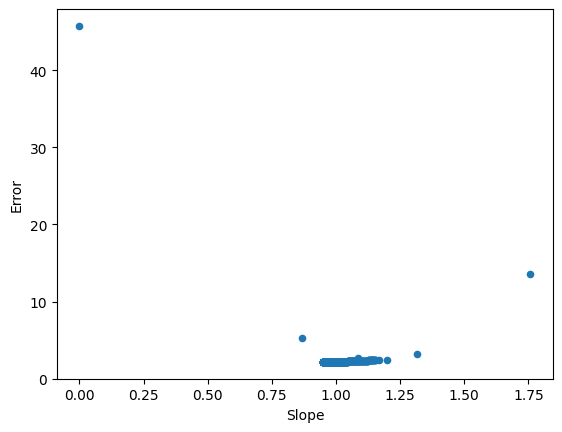

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
graph = {'Slope': slope_arr, 'Error': error_arr}
df = pd.DataFrame(graph)
df.plot(kind = 'scatter', x = 'Slope', y = 'Error')
plt.show()